In [6]:
import random

n_trials = 4000
n_hits = 0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    if x**2 + y**2 < 1.0: 
        n_hits += 1
print(4.0 * n_hits / float(n_trials))

3.133


In [45]:
import random, math
n_trials = 400000
n_hits = 0
var = 0.0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
    var += (Obs - math.pi)**2
print('the mean value \u00B1 the standard deviation of (Obs - math.pi) **2:  {0} \u00B1 {1}'.format(4.0 * n_hits / float(n_trials), math.sqrt(var / n_trials)))

the mean value ± the standard deviation of (Obs - math.pi) **2:  3.1433 ± 1.6409960466240308


# Markov_pi.py

In [9]:
import random

x, y = 1.0, 1.0
delta = 0.1
n_trials = 4000
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    #acceiption vs rejection
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    #counting
    if x**2 + y**2 < 1.0: n_hits += 1
print(4.0 * n_hits / float(n_trials))

3.318


# pebble_basic.py

In [11]:
import random

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
t_max = 4
site = 8
t = 0
print(site)
while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0, 3)]
    print(site)

8
8
7
7
4


# pebble_basic_multirun.py

In [12]:
import random

histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = 8
n_iter = 1000000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1 

norm = sum(weight)
print('comparison:  weight, histogram')
for k in range(9): 
    print('site: ', k,' weight: ', weight[k], ' histo: ', norm * histo[k] / float(n_iter))

comparison:  weight, histogram
site:  0  weight:  3.0  histo:  2.95896
site:  1  weight:  0.5  histo:  0.49967
site:  2  weight:  1.0  histo:  1.00541
site:  3  weight:  0.5  histo:  0.50458
site:  4  weight:  1.0  histo:  1.00896
site:  5  weight:  0.5  histo:  0.5056
site:  6  weight:  2.0  histo:  2.01763
site:  7  weight:  0.5  histo:  0.50148
site:  8  weight:  1.0  histo:  0.99771


# pebble_basic_movie.py

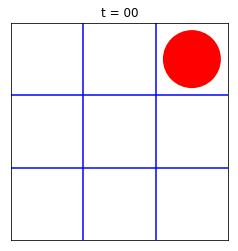

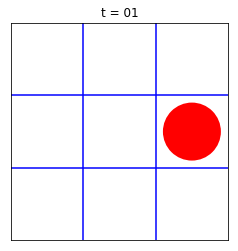

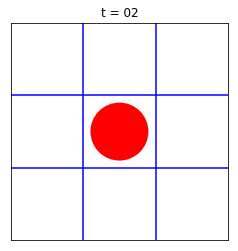

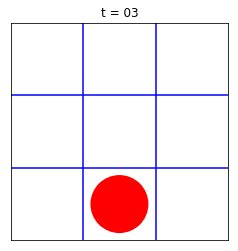

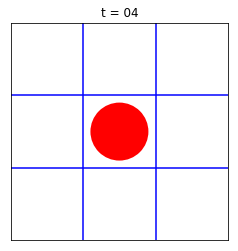

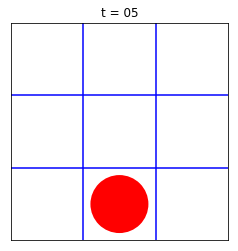

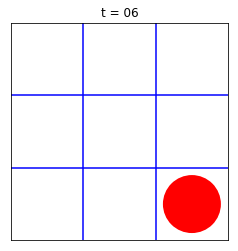

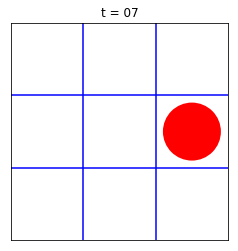

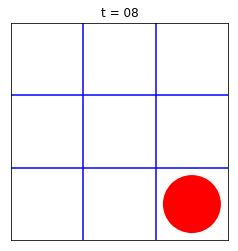

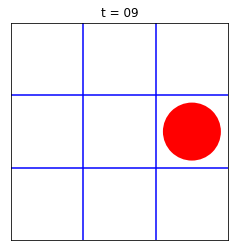

In [14]:
import random, pylab

sigma = 0.4  # sigma and s_map are needed for the graphical output
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
site = 8
N_runs = 10
for run in range(N_runs):
    if run < 10: number_string = '0'+str(run)
    else: number_string = str(run)
    # Begin of graphical output
    cir = pylab.Circle(s_map[site], radius=sigma, fc='r')
    pylab.gca().add_patch(cir)
    pylab.plot([0.5, 3.5], [1.5, 1.5], 'b')
    pylab.plot([0.5, 3.5], [2.5, 2.5], 'b')
    pylab.plot([1.5, 1.5], [0.5, 3.5], 'b')
    pylab.plot([2.5, 2.5], [0.5, 3.5], 'b')
    pylab.title('t = '+ number_string)
    pylab.axis('scaled')
    pylab.axis([0.5, 3.5, 0.5, 3.5])
    pylab.xticks([])
    pylab.yticks([])
    pylab.savefig('pebble_basic_movie_'+number_string+'.png', transparent=False)
    pylab.show()
    pylab.clf()
    # End of graphical output
    site = neighbor[site][ random.randint(0, 3)]

# pebble_multirun_histogram.py

[[ 0.    0.    2.25]
 [ 0.    0.    0.  ]
 [ 0.    0.    0.  ]]
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


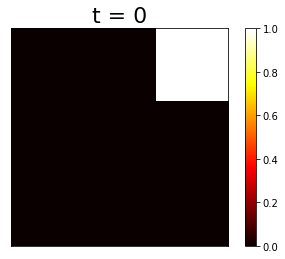

In [15]:
## multirun histogram
import random
import numpy as np
import matplotlib.pyplot as plt

xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 

neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}

list_vec = []
run = 0
if run < 10:  run_str= '0' + str(run)
else: run_str = str(run)
for n_runs in range(100000): 
    pos = 9
    for iter in range(run):
        pos = neighbor[pos][ random.randint(0, 3)]
    list_vec.append(pos)

x = [xvec[k] for k in list_vec]
y = [yvec[k] for k in list_vec]

plt.xticks([])
plt.yticks([])
H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
           range=[[1,3],[1,3]], normed=True)
print(H)
H /= np.sum(H)
print(H)
extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
plt.imshow(H, extent=extent, interpolation='nearest', vmin=0.0, vmax=1.0)
plt.set_cmap('hot')
plt.colorbar()
plt.title('t = '+str(run),fontsize=22)
#plt.savefig('3x3_pebble_run_'+run_str+'.png')
plt.show()

# pebble_multirun_all_histogram.py

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 

neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}

N_runs = 10
for run in range(N_runs):
    list_vec = []
    if run < 10:  run_str= '0'+str(run)
    else: run_str = str(run)
    for n_runs in range(100000): 
        pos = 9
        for iter in range(run):
            pos = neighbor[pos][ random.randint(0, 3)]
        list_vec.append(pos)

    x = [xvec[k] for k in list_vec]
    y = [yvec[k] for k in list_vec]

    plt.xticks([])
    plt.yticks([])
    H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
               range=[[1,3],[1,3]], normed=True)
    print(H)
    H /= np.sum(H)
    print(H)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    histo = plt.imshow(H, extent=extent, interpolation='nearest', vmin=0, vmax=1.00)
    histo.set_cmap('hot')
    plt.colorbar()
    plt.title('t = '+str(run),fontsize=22)
    #plt.savefig('3x3_pebble_run_'+run_str+'.png')
    plt.close()

[[ 0.    0.    2.25]
 [ 0.    0.    0.  ]
 [ 0.    0.    0.  ]]
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.        0.563175  1.122525]
 [ 0.        0.        0.5643  ]
 [ 0.        0.        0.      ]]
[[ 0.      0.2503  0.4989]
 [ 0.      0.      0.2508]
 [ 0.      0.      0.    ]]
[[ 0.1397025  0.4155975  0.848025 ]
 [ 0.         0.2810925  0.42327  ]
 [ 0.         0.         0.1423125]]
[[ 0.06209  0.18471  0.3769 ]
 [ 0.       0.12493  0.18812]
 [ 0.       0.       0.06325]]
[[ 0.178425   0.4241025  0.6312825]
 [ 0.103545   0.2119725  0.42021  ]
 [ 0.         0.1059975  0.174465 ]]
[[ 0.0793   0.18849  0.28057]
 [ 0.04602  0.09421  0.18676]
 [ 0.       0.04711  0.07754]]
[[ 0.221625   0.3613275  0.5200425]
 [ 0.1233225  0.2644425  0.3625875]
 [ 0.0528525  0.123615   0.220185 ]]
[[ 0.0985   0.16059  0.23113]
 [ 0.05481  0.11753  0.16115]
 [ 0.02349  0.05494  0.09786]]
[[ 0.229005   0.3414375  0.4464225]
 [ 0.16317    0.24129    0.3440925]
 [ 0.08874    0.16434    0.2315025]]

# pebble_transfer.py

In [20]:
import numpy

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25
position = numpy.zeros(9)
position[8] = 1.0
for t in range(100):
    print(t,'  ',["%0.5f" % i for i in position])
    position = numpy.dot(transfer, position)

0    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '1.00000']
1    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.25000', '0.00000', '0.25000', '0.50000']
2    ['0.00000', '0.00000', '0.06250', '0.00000', '0.12500', '0.18750', '0.06250', '0.18750', '0.37500']
3    ['0.00000', '0.04688', '0.07812', '0.04688', '0.09375', '0.18750', '0.07812', '0.18750', '0.28125']
4    ['0.02344', '0.05469', '0.09766', '0.05469', '0.11719', '0.16016', '0.09766', '0.16016', '0.23438']
5    ['0.03906', '0.07324', '0.10254', '0.07324', '0.10742', '0.15234', '0.10254', '0.15234', '0.19727']
6    ['0.05615', '0.08057', '0.10767', '0.08057', '0.11279', '0.13989', '0.10767', '0.13989', '0.17480']
7    ['0.06836', '0.08929', '0.10895', '0.08929', '0.11023', '0.13379', '0.10895', '0.13379', '0.15735']
8    ['0.07883', '0.09421', '0.11024', '0.09421', '0.11154', '0.12758', '0.11024', '0.12758', '0.14557']
9    ['0.08652', '0.09871', '0.11057', '0.09871', '0.11

limit_output extension: Maximum message size of 10000 exceeded with 10590 characters

# pebble_transfer_eigen.py

In [28]:
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print(eigenvalues)
 
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(9):
  #  print(eigenvalues[iter])
    #for i in range(9):
      # print(eigenvectors[i][iter])

[ -5.00000000e-01   1.00000000e+00   5.00000000e-01   2.50000000e-01
   7.50000000e-01   7.50000000e-01  -1.90418306e-18  -5.28343841e-17
   2.50000000e-01]


# pebble_transfer_sub.py

In [26]:
import numpy

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = numpy.zeros(9)
position[8] = 1.0
for t in range(100):
    print(t,'  ',["%0.5f" % abs(i- 1.0 / 9.0) for i in position])
    position = numpy.dot(transfer, position)

0    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.88889']
1    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.13889', '0.11111', '0.13889', '0.38889']
2    ['0.11111', '0.11111', '0.04861', '0.11111', '0.01389', '0.07639', '0.04861', '0.07639', '0.26389']
3    ['0.11111', '0.06424', '0.03299', '0.06424', '0.01736', '0.07639', '0.03299', '0.07639', '0.17014']
4    ['0.08767', '0.05642', '0.01345', '0.05642', '0.00608', '0.04905', '0.01345', '0.04905', '0.12326']
5    ['0.07205', '0.03787', '0.00857', '0.03787', '0.00369', '0.04123', '0.00857', '0.04123', '0.08615']
6    ['0.05496', '0.03054', '0.00345', '0.03054', '0.00168', '0.02878', '0.00345', '0.02878', '0.06369']
7    ['0.04275', '0.02182', '0.00216', '0.02182', '0.00088', '0.02268', '0.00216', '0.02268', '0.04624']
8    ['0.03228', '0.01690', '0.00087', '0.01690', '0.00043', '0.01647', '0.00087', '0.01647', '0.03446']
9    ['0.02459', '0.01241', '0.00054', '0.01241', '0.00

limit_output extension: Maximum message size of 10000 exceeded with 10590 characters

# pebble_dual_eigen.py

In [18]:
# pebble_dual_eigen
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((18, 18))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25     # red pebble game
        transfer[neighbor[k][neigh]+9, k+9] += 0.25 # blue pebble game   
# small transition epsilon between red 2 and blue 6
epsilon = 0.04
transfer[6+9,2] = transfer[2,6+9] = epsilon
transfer[2,2] -= epsilon
transfer[6+9,6+9] -= epsilon
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print(eigenvalues)
 
# you may print the eigenvectors by uncommenting the following four lines
#for iter in range(18):
#    print eigenvalues[iter]
#    for i in range(18):
#        print eigenvectors[i][iter]

[ -5.02430015e-01 +0.00000000e+00j  -5.00000000e-01 +0.00000000e+00j
   1.00000000e+00 +0.00000000e+00j   9.92451031e-01 +0.00000000e+00j
   5.00000000e-01 +0.00000000e+00j   4.79023434e-01 +0.00000000e+00j
   7.25649298e-01 +0.00000000e+00j  -1.50050555e-02 +0.00000000e+00j
   2.40311308e-01 +0.00000000e+00j   5.39610095e-17 +0.00000000e+00j
   7.50000000e-01 +0.00000000e+00j   7.50000000e-01 +0.00000000e+00j
   7.50000000e-01 +0.00000000e+00j   1.74874997e-16 +0.00000000e+00j
  -2.60479512e-17 +0.00000000e+00j   2.50000000e-01 +0.00000000e+00j
   2.50000000e-01 +2.59438014e-17j   2.50000000e-01 -2.59438014e-17j]


# pebble_recurrent_eigen.py

In [29]:
import numpy

epsilon = 0.01
transfer = [[ epsilon, 1.0 - epsilon ],
            [ 1.0 - epsilon, epsilon ]]
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print(eigenvalues)
 
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(2):
#    print eigenvalues[iter]
#    for i in range(2):
#       print eigenvectors[i][iter]

[ 1.   -0.98]


In [34]:
import random
N=20
position=0
for t in range(100000):
    dir =random.choice([-1,1])
    position=(position+dir)%N
print(dir)

-1
